In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [77]:
def fetch_data(coin='bitcoin', calculation='next_day_increase'):
    url = f'https://coinmarketcap.com/currencies/{coin}/historical-data/?start=20130428&end=20180121'
    df = pd.read_html(url, attrs={'class': 'table'})
    df = df[0]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df['Volume'].replace('-', 0, inplace=True)
    if calculation == 'next_day_increase':
        df['next_day_increase'] = df.shift(1)['Close'] > df['Close']
        df['next_day_increase'].replace(True, 1, inplace=True)
        df['next_day_increase'].replace(False, 0, inplace=True)
    elif calculation == 'next_week_increase':
        df['next_week_increase'] = df.shift(7)['Close'] > df['Close']
        df['next_week_increase'].replace(True, 1, inplace=True)
        df['next_week_increase'].replace(False, 0, inplace=True)
    elif calculation == 'next_month_increase':
        df['next_month_increase'] = df.shift(30)['Close'] > df['Close']
        df['next_month_increase'].replace(True, 1, inplace=True)
        df['next_month_increase'].replace(False, 0, inplace=True)
    return df
    

In [78]:
def fetch_data_and_train_clf(coin='bitcoin', calculation='next_day_increase'):
    df = fetch_data(coin=coin, calculation=calculation)
    y = df.pop(calculation)
    X = df
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
    clf = train_clf(X_train, y_train)
    return clf

In [5]:
def plot_feature_importances(model):
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [6]:
def train_clf(X_train, y_train, n_estimators=500, n_jobs=-1, max_depth=None, min_samples_leaf=1):
    forest = RandomForestRegressor(n_estimators=n_estimators, random_state=2, n_jobs=n_jobs, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    forest.fit(X_train, y_train)
    return forest

In [79]:
forest = fetch_data_and_train_clf()

In [80]:
forest.score(X_train, y_train)

0.84559959365974879

In [81]:
forest.score(X_test, y_test)

-0.1432291100172709

In [10]:
plot_feature_importances(forest)

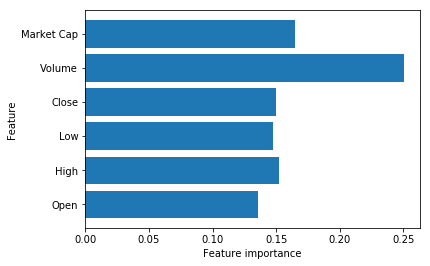

In [11]:
plt.show()

In [56]:
def fetch_coin_names(limit=10):
    url = "https://api.coinmarketcap.com/v1/ticker/"
    if limit:
        url += "?limit=" + str(limit)
    df = pd.read_json(url)
    return df.id.tolist

In [57]:
def 

In [58]:
def find_gaining_coins(coins=fetch_coin_names()):
    

<bound method Series.tolist of 0         bitcoin
1        ethereum
2          ripple
3    bitcoin-cash
4        litecoin
5         cardano
6             neo
7         stellar
8             eos
9            iota
Name: id, dtype: object>

In [75]:
a = fetch_data(coin='ripple', calculation='next_day_increase')

In [76]:
a

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-01-21,1.580000,1.580000,1.340000,1.380000,2840750000,61061900000
2018-01-20,1.560000,1.630000,1.500000,1.580000,2346450000,60543000000
2018-01-19,1.580000,1.700000,1.500000,1.550000,3697430000,61291900000
2018-01-18,1.310000,1.730000,1.260000,1.600000,9110440000,50577100000
2018-01-17,1.180000,1.380000,0.897797,1.310000,7251210000,45854700000
2018-01-16,1.680000,1.700000,0.909313,1.180000,5687960000,65018400000
2018-01-15,1.860000,1.900000,1.670000,1.680000,1838460000,71909400000
2018-01-14,2.020000,2.020000,1.810000,1.860000,1978200000,78195800000
2018-01-13,2.050000,2.120000,1.980000,2.020000,2130170000,79469700000


In [70]:
a

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-01-21,1.580000,1.580000,1.340000,1.380000,2840750000,61061900000
2018-01-20,1.560000,1.630000,1.500000,1.580000,2346450000,60543000000
2018-01-19,1.580000,1.700000,1.500000,1.550000,3697430000,61291900000
2018-01-18,1.310000,1.730000,1.260000,1.600000,9110440000,50577100000
2018-01-17,1.180000,1.380000,0.897797,1.310000,7251210000,45854700000
2018-01-16,1.680000,1.700000,0.909313,1.180000,5687960000,65018400000
2018-01-15,1.860000,1.900000,1.670000,1.680000,1838460000,71909400000
2018-01-14,2.020000,2.020000,1.810000,1.860000,1978200000,78195800000
2018-01-13,2.050000,2.120000,1.980000,2.020000,2130170000,79469700000
